In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

from classification import Perceptron, AdalineGD, AdalineSGD


In [2]:
df = pl.read_csv("../../data/iris.csv")
df = df.filter(pl.col("class").is_in(["Iris-setosa", "Iris-versicolor"]))
df.shape

(100, 5)

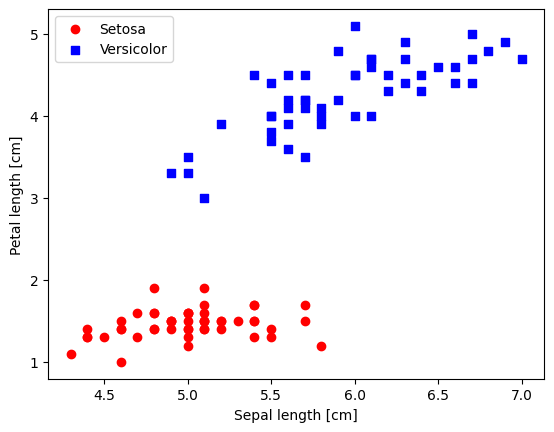

In [3]:
df_is = df.filter(pl.col("class")=="Iris-setosa")
df_iv = df.filter(pl.col("class")=="Iris-versicolor")
plt.scatter(df_is["sepal_length"], df_is["petal_length"], color="red", marker="o", label="Setosa")
plt.scatter(df_iv["sepal_length"], df_iv["petal_length"],color="blue", marker="s", label="Versicolor")

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

In [4]:
X = df.select(["sepal_length","petal_length"]).to_numpy()
y = np.where(df["class"]=="Iris-setosa",0, 1)

ppn =Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

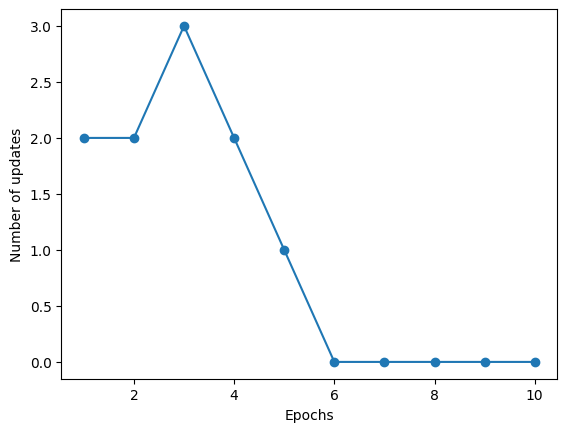

In [5]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [6]:
def plot_decision_regions(X, y, classifier:Perceptron, resolution:float= 0.02):
    # setup marker generator and color map
    marker = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=0.8,
            c = colors[idx],
            marker=marker[idx],
            label = f"Class {cl}",
            edgecolors="black"
        )

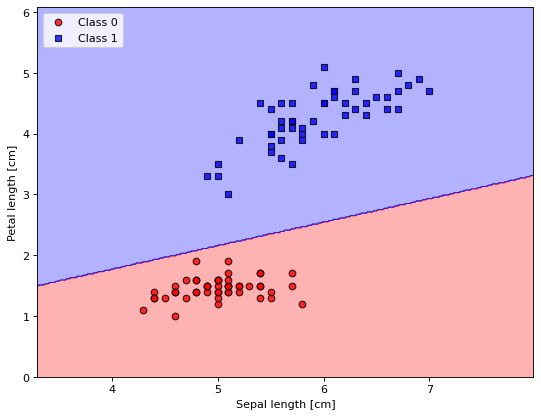

In [7]:
figure(figsize=(8, 6), dpi=80)
plot_decision_regions(X,y, ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

## AdalineGD

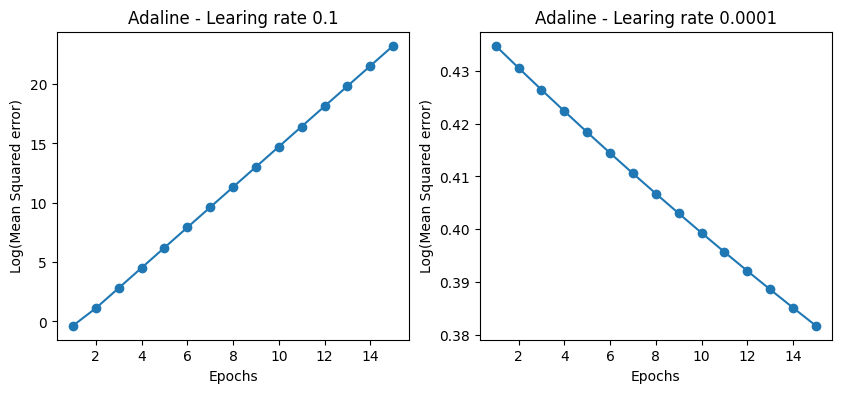

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10, 4))
# eta 0.1
ada1 = AdalineGD(eta=0.1, n_iter=15).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Log(Mean Squared error)")
ax[0].set_title("Adaline - Learing rate 0.1")

# eta 0.0001
ada2 = AdalineGD(eta=0.0001, n_iter=15).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_)+1), ada2.losses_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Log(Mean Squared error)")
ax[1].set_title("Adaline - Learing rate 0.0001")

plt.show()

In [9]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()
ada_gd = AdalineGD(eta=0.5, n_iter=20)
ada_gd.fit(X_std, y)

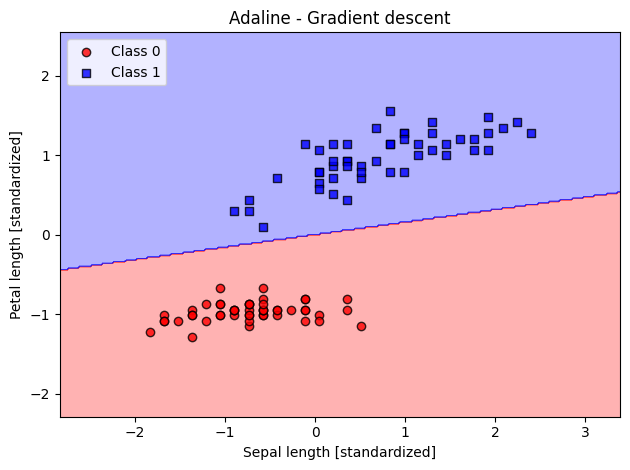

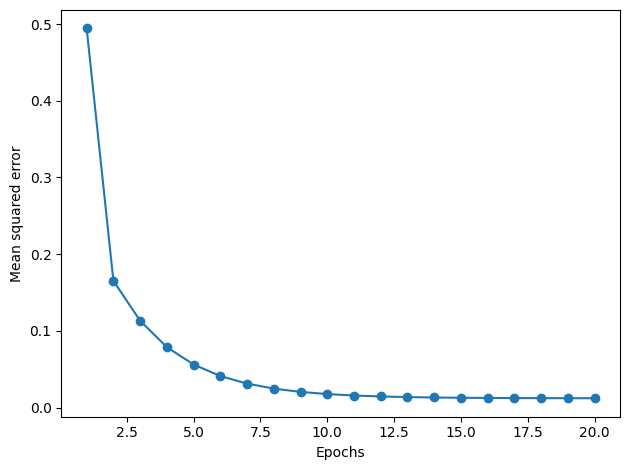

In [10]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_)+1), ada_gd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()

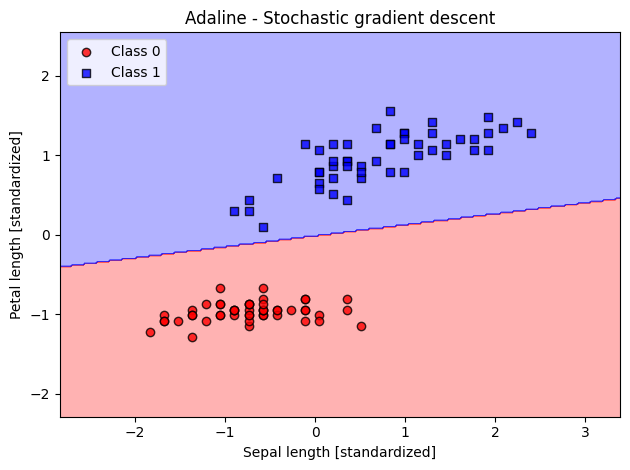

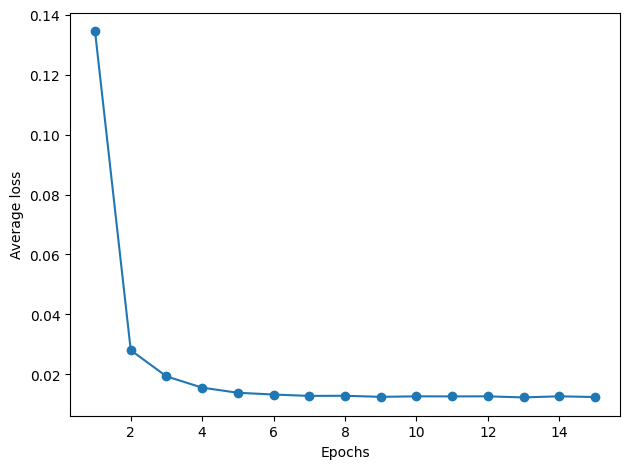

In [11]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()